In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

In [3]:
hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]


for hhid in hhids: 
    X=[]
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_filled2/processed_hhdata_{}_2.csv'.format(hhid), index_col=0)

    features = ['use','temperature', 'cloud_cover','wind_speed','is_weekday','month','hour']



    Y = list(df.AC)[500:]
    Y = np.array(Y)
    print(Y.shape)
    print(Y[0])
    
    #get X
    for index, row in df.iterrows():
        if index>=500:
            rowlist=row[features]
            rowlist = rowlist.tolist()
            X.append(rowlist)
            rowlist.append(df.AC.iloc[index-1])
            #rowlist.append(df.AC.iloc[index-24])
            rowlist.append(df.AC.iloc[index-168])

#             for i in range(1,169):
#                 rowlist.append(df.use.iloc[index-i])

    X = np.array(X)
    print(X.shape)
    print(X[0])
    print(len(X[0]))
    


    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.10,
                                                        random_state=666)


    classifiers = [
        linear_model.Ridge(alpha=1.0, random_state=0),
        linear_model.Lasso(alpha=0.55, random_state=0),
        linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06),
        linear_model.LassoLars(alpha=0.55),
        linear_model.LinearRegression(),
        ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        tree.DecisionTreeRegressor(),
        neural_network.MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    ]


    print('Start :: Find the best model for this household...')
    for clf in classifiers:
        clf.fit(X_train, Y_train)
        print(clf)
        yhat = clf.predict(X_test)
        scores = cross_val_score(clf, X_train, Y_train)
        rmse = np.sqrt(mean_squared_error(Y_test, yhat))
        nrmse = rmse/(df.AC.max()-df.AC.min())
        mae = mean_absolute_error(Y_test, yhat)
        print('RMSE =>', rmse)
        print('nRMSE =>', nrmse)
        print('MAE =>', mae)
        print('CV Score =>', scores)
        model_dict = {
            'name': clf.__class__.__name__,
            'rmse': rmse,
            'nrmse': nrmse,
            'mae': mae,
        }
        result[hhid].append(model_dict)
        print('')

Start :: Process on household 26...
(8285,)
0.0
(8285, 9)
[ 0.77893333 48.71        0.          5.15        1.          1.
 20.          0.          0.        ]
9
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 0.949671657834519
nRMSE => 0.1899343315669038
MAE => 0.6441122281416034
CV Score => [0.35432023 0.29207313 0.34751103]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 1.090750338539571
nRMSE => 0.21815006770791417
MAE => 0.8420500770854059
CV Score => [0.09094612 0.11155093 0.08015197]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 0.9495

RMSE => 0.5257334127523086
nRMSE => 0.10514668255046171
MAE => 0.25601465002678386
CV Score => [0.7594017  0.75798068 0.78210407]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.7357780026121757
nRMSE => 0.14715560052243515
MAE => 0.3185109447681988
CV Score => [0.61901512 0.55691324 0.58168028]

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbos

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE => 0.553356645918562
nRMSE => 0.1106713291837124
MAE => 0.26396993709567185
CV Score => [0.76533008 0.75142004 0.78623506]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.6990304346453367
nRMSE => 0.13980608692906732
MAE => 0.2808179234772853
CV Score => [0.57225253 0.50638926 0.53432736]

MLPRegressor(activation='relu', alpha=0.0001, ba

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE => 0.5377008798509584
nRMSE => 0.10754017597019168
MAE => 0.26075772397760877
CV Score => [0.77141475 0.7662914  0.78856862]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.7535516085090833
nRMSE => 0.15071032170181667
MAE => 0.3158075014926269
CV Score => [0.59118486 0.55048988 0.59057928]

MLPRegressor(activation='relu', alpha=0.0001, 

In [4]:
final = []
for k, v in result.items():
    for i in result[k]:
        final.append([str(k), i['name'], i['rmse'],i['nrmse'], i['mae']])
col = ['household_id', 'alg', 'RMSE','nRMSE', 'MAE']
final = pd.DataFrame(data=final, columns=col)
final.to_csv('GHI.csv')

In [5]:
final

,household_id,alg,RMSE,nRMSE,MAE
0,26,Ridge,0.949672,0.189934,0.644112
1,26,Lasso,1.090750,0.218150,0.842050
2,26,BayesianRidge,0.949573,0.189915,0.644344
3,26,LassoLars,1.147444,0.229489,0.907336
4,26,LinearRegression,0.949675,0.189935,0.644106
5,26,RandomForestRegressor,0.532112,0.106422,0.261270
6,26,DecisionTreeRegressor,0.677244,0.135449,0.284854
7,26,MLPRegressor,0.642981,0.128596,0.420622
8,59,Ridge,0.945345,0.189069,0.629666
9,59,Lasso,1.090750,0.218150,0.842050


In [6]:
gb = final.groupby('alg')

In [7]:
N = 9
ind = range(N)
mean = list(gb['nRMSE'].describe()['mean'])
mean.append(0.23297156073409236)
std = list(gb['nRMSE'].describe()['std'])
std.append(1.4433315687225568e-09)

In [8]:
print(mean, std)

[0.1938314516960033, 0.1450862130915537, 0.21884951435417008, 0.2293589980620351, 0.19383912642801135, 0.12699550306991517, 0.1076644967426161, 0.19383885031660325, 0.23297156073409236] [0.006540992680254585, 0.00621285619469945, 0.0022118445039347955, 0.00041039642777432637, 0.006548695031833495, 0.005722274213178129, 0.0019309723146951482, 0.006548318754353737, 1.4433315687225568e-09]


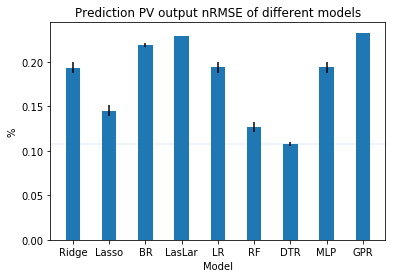

In [9]:
p1 = plt.bar(ind, mean, 0.4, yerr=std)

plt.ylabel('%')
plt.title('Prediction PV output nRMSE of different models')
#plt.ylim(0,0.3)
plt.xlabel('Model')
plt.xticks(ind, ('Ridge', 'Lasso','BR' ,'LasLar', 'LR', 'RF', 'DTR', 'MLP','GPR'))
# plt.yticks(np.arange(50, 2))
plt.axhline(y=gb['nRMSE'].describe()['mean']['RandomForestRegressor'], linewidth=0.15)
plt.savefig('ghi.png')